# Experiments

In [1]:
from IPython.display import IFrame
! mkdir -p figs
! mkdir -p training_runs

This file presents a Jupyter notebook interface to the experiments. Each section contains a specific experiment, notes about the output which you'll see in the notebook when you execute the cell, as well as a cell with a command to run the experiment.

## table_1_minibatch_gradient_benchmark

(**CPU friendly**) This is okay to run on typical laptop CPU.

This experiment will print out the batch sizes for each trial, and the mean and standard deviation of timings for for each batch size.

In [2]:
%run ./experiments/table_1_minibatch_gradient_benchmark/genjax_vae_overhead.py

/home/femtomc/.cache/pypoetry/virtualenvs/programmable-vi-pldi-2024-wktT2A4B-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GenJAX VI timings:
Batch sizes: [64, 128, 256, 512, 1024]
(array([ 3.2510662,  5.572334 , 10.231137 , 17.31219  , 31.963547 ],
      dtype=float32), array([0.21272574, 2.0414262 , 2.1288395 , 1.691629  , 5.045877  ],
      dtype=float32))
Handcoded timings:
Batch sizes: [64, 128, 256, 512, 1024]
(array([ 3.345306 ,  5.3966055,  9.804233 , 15.3170595, 31.775038 ],
      dtype=float32), array([0.06193171, 0.04953469, 2.064177  , 4.5305977 , 6.054197  ],
      dtype=float32))


## table_2_benchmark_timings

(**GPU required**) This should be run on a GPU.

For this experiment, `pytest` will run, and then display a precise timing table (with timing statistics) for each training experiment.

In [3]:
! just table_2

poetry run pytest experiments/table_2_benchmark_timings --benchmark-disable-gc
============================= test session starts ==============================
platform linux -- Python 3.10.13, pytest-8.0.2, pluggy-1.4.0
benchmark: 4.0.0 (defaults: timer=time.perf_counter disable_gc=True min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/femtomc/programmable-vi-pldi-2024
plugins: jaxtyping-0.2.28, benchmark-4.0.0, anyio-4.3.0, typeguard-2.13.3
collected 6 items                                                              

experiments/table_2_benchmark_timings/test_genjax_enum_air_benchmark.py . [ 16%]
                                                                         [ 16%]
experiments/table_2_benchmark_timings/test_genjax_iwae_mvd_air_benchmark.py . [ 33%]
                                                                         [ 33%]
experiments/table_2_benchmark_timings/test_genjax_mvd_air_benchmark.py . 

## table_4_objective_values

(**CPU friendly**) This is okay to run on typical laptop CPU.

For each of the scripts and loss functions (ELBO, IWAE, HVI-ELBO, IWHVI, DIWHVI) -- the first number is the mean over training trials, and the second number is the standard deviation.

**NOTE: Pyro has a different convention on the sign of the loss** the values _are_ comparable, it's just a convention of optimization (ascent vs. descent).

In [4]:
%run experiments/table_4_objective_values/genjax_cone.py
%run experiments/table_4_objective_values/genjax_cone_marginal.py
%run experiments/table_4_objective_values/numpyro_cone.py
%run experiments/table_4_objective_values/pyro_cone.py

ELBO:
(Array(-8.0759735, dtype=float32), Array(0.8189303, dtype=float32))
IWAE(K = 5):
(Array(-7.674431, dtype=float32), Array(2.659954, dtype=float32))
HVI-ELBO(N = 1):
(Array(-9.751299, dtype=float32), Array(0.9588641, dtype=float32))
IWHVI(N = 5, K = 1):
(Array(-8.182691, dtype=float32), Array(0.91353637, dtype=float32))
IWHVI(N = 5, K = 5) (also called DIWHVI):
(Array(-7.298371, dtype=float32), Array(1.6482085, dtype=float32))


100%|███████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1274.32it/s, init loss: 450.7343, avg. loss [5701-6000]: 8.0853]


NumPyro TraceGraph ELBO:
(Array(8.087664, dtype=float32), Array(0.11515266, dtype=float32))


100%|████████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1302.18it/s, init loss: 71.4061, avg. loss [5701-6000]: 7.9096]


NumPyro RenyiELBO(k = 5):
(Array(7.869861, dtype=float32), Array(1.9360248, dtype=float32))


Guessed max_plate_nesting = 1
Guessed max_plate_nesting = 1


Pyro ELBO:
(tensor(8.0826), tensor(0.1097))
Pyro IWAE(K = 5):
(tensor(7.8313), tensor(2.4540))


## fig_2_noisy_cone

(**CPU friendly**) This is okay to run on typical laptop CPU.

The stream of numbers is the mean loss every 1000 iterations.

In [5]:
!python ./experiments/fig_2_noisy_cone/genjax_cone.py

-825.4226
-7.987867
-8.034029
-8.206104
-7.992387
-1265.4696
-8.004254
-8.012936
-7.9295263
-8.150595
-3.8820481
-7.9616923
-7.804139
-6.5294604
-7.2643905
-26.630377
-6.9312296
-6.710473
-7.042858
-6.96737


In [6]:
!python ./experiments/fig_2_noisy_cone/genjax_cone_marginal.py

-325.33633
-9.669909
-9.649338
-9.708999
-9.434217
-324.4588
-8.089448
-8.0541725
-8.160623
-7.913017
-34.542133
-7.080697
-7.238871
-7.52734
-7.0330544


The resultant PDFs can be shown using `IFrame` here.

In [7]:
IFrame("./figs/fig_2_diwhvi_trained_expressive_variational_elbo_samples.pdf", width=600, height=600)

<IPython.lib.display.IFrame object at 0x7f39d30dd1e0>

## fig_7_air_estimator_evaluation

(**GPU required**) This should be run on a GPU.

The below cell runs the `genjax` experiments, and saves `.csv` files to the `./training_runs` directory.

In [8]:
%run ./experiments/fig_7_air_estimator_evaluation/genjax_enum_air.py
%run ./experiments/fig_7_air_estimator_evaluation/genjax_mvd_air.py
%run ./experiments/fig_7_air_estimator_evaluation/genjax_reinforce_air.py
%run ./experiments/fig_7_air_estimator_evaluation/genjax_hybrid_air.py
%run ./experiments/fig_7_air_estimator_evaluation/genjax_rws_air.py

Epoch=0, total_epoch_step_time=12.40, loss=55.08
accuracy=0.22419999539852142, counts=[[11049  8153   742     4]
 [17597  2401    22     0]
 [19475   555     2     0]]
Epoch=1, total_epoch_step_time=25.14, loss=409.48
accuracy=0.2234666645526886, counts=[[11334  7783   818    13]
 [17920  2074    26     0]
 [19475   557     0     0]]
Epoch=2, total_epoch_step_time=38.02, loss=429.84
accuracy=0.22678333520889282, counts=[[11668  7408   858    14]
 [18058  1939    23     0]
 [19451   581     0     0]]
Epoch=3, total_epoch_step_time=51.00, loss=447.45
accuracy=0.24166667461395264, counts=[[12583  6688   666    11]
 [18077  1915    28     0]
 [19470   560     2     0]]
Epoch=4, total_epoch_step_time=64.07, loss=455.82
accuracy=0.25138333439826965, counts=[[13245  6203   493     7]
 [18168  1838    14     0]
 [19456   576     0     0]]
Epoch=5, total_epoch_step_time=77.16, loss=457.84
accuracy=0.2624833285808563, counts=[[13923  5677   345     3]
 [18181  1825    14     0]
 [19359   672    

The below cell runs the `pyro` experiments, and saves `.csv` files to the `./training_runs` directory.

In [ ]:
%run ./experiments/fig_7_air_estimator_evaluation/pyro_reinforce_air.py
%run ./experiments/fig_7_air_estimator_evaluation/pyro_baselines_air.py

/home/femtomc/.cache/pypoetry/virtualenvs/programmable-vi-pldi-2024-wktT2A4B-py3.10/lib/python3.10/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/femtomc/.cache/pypoetry/virtualenvs/programmable-vi-pldi-2024-wktT2A4B-py3.10/lib/python3.10/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/femtomc/.cache/pypoetry/virtualenvs/programmable-vi-pldi-2024-wktT2A4B-py3.10/lib/python3.10/site-packages/pyro/util.py:544: UserWarning: z_pres_0Found sample sites configured for enumeration:, z_pres_1Found sample sites configured 

Epoch=0, current_epoch_step_time=98.36, loss=-471.70
accuracy=0.227566659450531, counts=tensor([[10479,  5752,  2454,  1263],
        [ 3410,  2431,  1957, 12222],
        [  966,   778,   744, 17544]])
Epoch=1, current_epoch_step_time=97.87, loss=-515.28
accuracy=0.19423332810401917, counts=tensor([[10142,  7066,  2155,   585],
        [ 1326,  1328,  1127, 16239],
        [  125,   122,   184, 19601]])
Epoch=2, current_epoch_step_time=97.35, loss=-538.27
accuracy=0.21236667037010193, counts=tensor([[12168,  6779,   963,    38],
        [  638,   552,   437, 18393],
        [   22,    17,    22, 19971]])
Epoch=3, current_epoch_step_time=98.34, loss=-554.97
accuracy=0.23395000398159027, counts=tensor([[13564,  5777,   586,    21],
        [  509,   450,   424, 18637],
        [    7,    11,    23, 19991]])
Epoch=4, current_epoch_step_time=97.33, loss=-565.05
accuracy=0.2640833258628845, counts=tensor([[15259,  4365,   313,    11],
        [  643,   526,   639, 18212],
        [   10,  

**IMPORTANT**: `pyro` RWS takes quite a long time to run (because we have to use batch size 1). On our tests, a single epoch took ~46 minutes (and there are 6 epochs of training for this experiment).

Choose if you'd like to generate the training run data for this experiment:

In [ ]:
# %run ./python experiments/fig_7_air_estimator_evaluation/pyro_rws_air.py

The below cell runs the analysis over all the training runs, and generates a figure (`./figs/fig_7_air_full.pdf`).

Pyro AIR RWS not found.


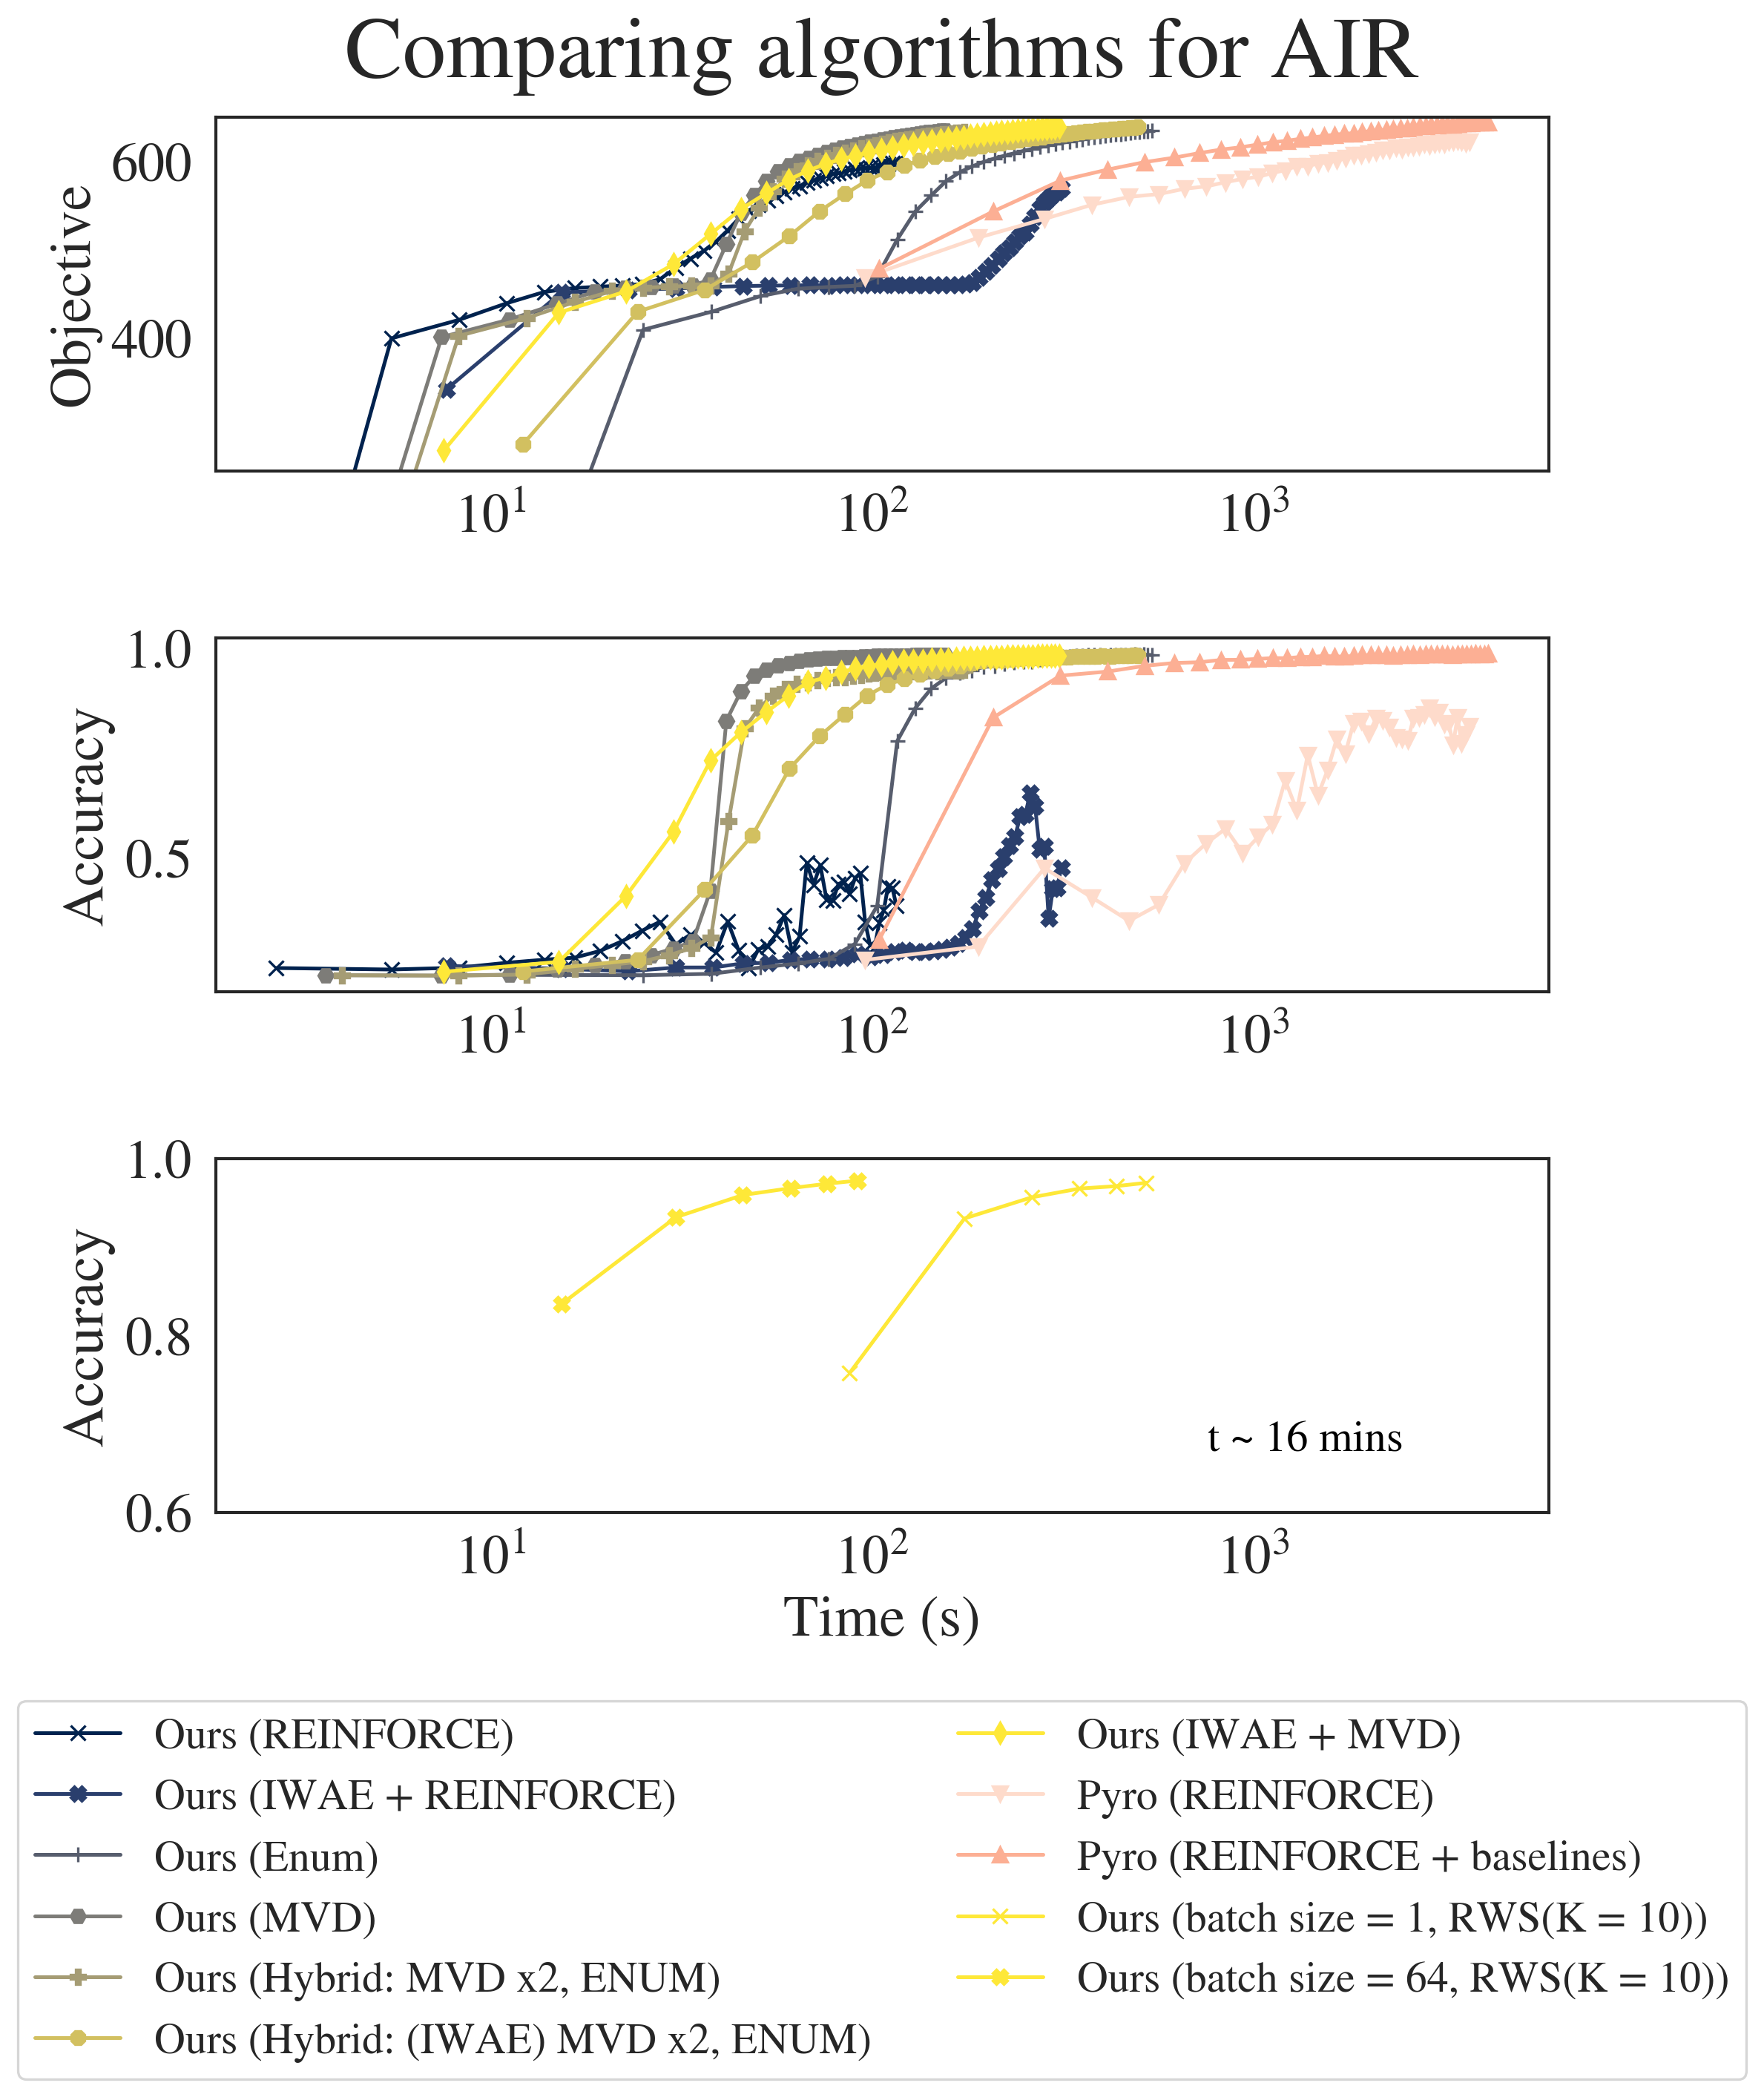

In [2]:
%run ./experiments/fig_7_air_estimator_evaluation/air_analysis.py